I) SIMPLE LINEAR REGRESSION USING NUMPY & PANDAS

In [85]:
import random

In [86]:
rangeX = (0, 1000)
rangeY = (0, 1000)
coords = []
i = 0
while i < 1000:
    x = random.randrange(*rangeX)
    y = random.randrange(*rangeY)
    coords.append([x, y])
    i += 1
print(coords)


[[36, 185], [506, 499], [475, 564], [385, 443], [710, 671], [817, 758], [376, 1], [725, 460], [620, 885], [564, 321], [224, 394], [486, 82], [389, 659], [591, 17], [741, 150], [545, 468], [250, 331], [470, 205], [928, 682], [938, 270], [462, 363], [7, 972], [126, 549], [579, 38], [968, 946], [104, 677], [697, 324], [112, 926], [248, 101], [415, 154], [828, 203], [203, 756], [381, 593], [305, 485], [721, 156], [443, 530], [83, 674], [787, 371], [534, 424], [535, 186], [508, 719], [80, 68], [998, 893], [814, 293], [826, 91], [36, 257], [431, 983], [389, 488], [955, 593], [364, 68], [972, 806], [480, 120], [738, 620], [990, 951], [295, 803], [733, 213], [633, 175], [874, 846], [670, 590], [298, 700], [976, 685], [636, 72], [291, 175], [343, 511], [137, 11], [524, 36], [714, 74], [733, 27], [961, 644], [83, 578], [769, 774], [155, 508], [801, 541], [175, 815], [39, 494], [356, 440], [835, 991], [530, 565], [623, 376], [221, 863], [51, 771], [933, 112], [66, 78], [459, 376], [340, 262], [64

In [87]:
import csv
fields = ['x', 'y']
with open('lin_reg.csv', 'w') as f:

    # using csv.writer method from CSV package
    write = csv.writer(f)

    write.writerow(fields)
    write.writerows(coords)


In [88]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
dataset = pd.read_csv('lin_reg.csv')
ds = dataset.dropna()
print(dataset.shape)
dataset.head()


(1000, 2)


,x,y
0,36,185
1,506,499
2,475,564
3,385,443
4,710,671


In [89]:
X = dataset['x'].values
Y = dataset['y'].values
# mean of our inputs and outputs
x_mean = np.mean(X)
y_mean = np.mean(Y)
# total number of values
n = len(X)
# using the formula to calculate the b1 and b0
num = 0
denom = 0
for i in range(n):
    num += (X[i] - x_mean) * (Y[i] - y_mean)
    denom += (X[i] - x_mean) ** 2

m = num / denom
c = y_mean - (m * x_mean)
# printing the coefficient
print("Optimal Slope: ", m)
print("Optimal intercept: ", c)


Optimal Slope:  0.05812553125501923
Optimal intercept:  458.3574588686308


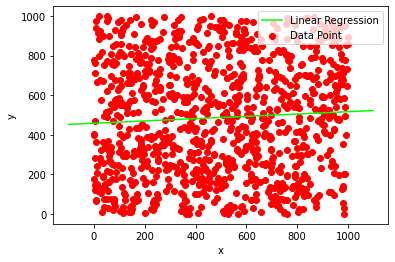

In [90]:
x_max = np.max(X) + 100
x_min = np.min(X) - 100
x = np.linspace(x_min, x_max, 1000)
y = c + m * x
plt.plot(x, y, color='#00ff00', label='Linear Regression')
plt.scatter(X, Y, color='#ff0000', label='Data Point')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


In [91]:
rmse = 0
for i in range(n):
    y_pred = c + m * X[i]
    rmse += (Y[i] - y_pred) ** 2

rmse = np.sqrt(rmse/n)
print("RMSE value: ", rmse)


RMSE value:  285.7395666067631


In [92]:
sos = 0  # Sum of Squares
sor = 0  # Sum of residuals
for i in range(n):
    y_pred = c + m * X[i]
    sos += (Y[i] - y_mean) ** 2
    sor += (Y[i] - y_pred) ** 2

score = 1 - (sor/sos)
print("R^2 Score: ", score)


R^2 Score:  0.003484008963126284


**USING SKLEARN**

In [93]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [94]:
df = pd.read_csv('lin_reg.csv')
df_binary = df[['x', 'y']]
df = df.dropna()
# Taking only the selected two attributes from the dataset
df_binary.columns = ['x', 'y']
# display the first 5 rows
df_binary.head()


,x,y
0,36,185
1,506,499
2,475,564
3,385,443
4,710,671


In [95]:
y = df['x'].values.reshape(-1, 1)
X = df['y'].values.reshape(-1, 1)

In [96]:
print(df['y'].values)  # [2.5 5.1 3.2 8.5 3.5 1.5 9.2 ... ]
print(df['y'].values.shape)

[185 499 564 443 671 758   1 460 885 321 394  82 659  17 150 468 331 205
 682 270 363 972 549  38 946 677 324 926 101 154 203 756 593 485 156 530
 674 371 424 186 719  68 893 293  91 257 983 488 593  68 806 120 620 951
 803 213 175 846 590 700 685  72 175 511  11  36  74  27 644 578 774 508
 541 815 494 440 991 565 376 863 771 112  78 376 262 682   4 503 160 253
 388 647 650  88 829 899 609 758 257 704 504 742 635 300 352 712 828 913
 696 713 109 433 386 776 689 356 697 194 771 346 378 997 134 944 417 188
 619 960 141 339 105 820 705  78 788 519 350  75 161 401 874 104 115 975
 277 354 796 170 394 554 306 841 190 598  11  72 157 757 781 947 591 159
 305 123 939 681 862 335  13 880 335 481 580 699 605 273  75 695 407 364
 297 342 111 671 881  76 351 431 134 138 131  67 883 306 646 778 701 888
 399 651 809 658   6 176 839 315 658 714 853 883 807 971 565 436 770 841
 110 147 650 801 875 125 649 162 893 322 340 567 920  35 310 715 699 550
 847 698 950 476 268 323 961 173   2 896 665 962 63

In [97]:
print(X.shape)  # (25, 1)
print(X)

(1000, 1)
[[185]
 [499]
 [564]
 [443]
 [671]
 [758]
 [  1]
 [460]
 [885]
 [321]
 [394]
 [ 82]
 [659]
 [ 17]
 [150]
 [468]
 [331]
 [205]
 [682]
 [270]
 [363]
 [972]
 [549]
 [ 38]
 [946]
 [677]
 [324]
 [926]
 [101]
 [154]
 [203]
 [756]
 [593]
 [485]
 [156]
 [530]
 [674]
 [371]
 [424]
 [186]
 [719]
 [ 68]
 [893]
 [293]
 [ 91]
 [257]
 [983]
 [488]
 [593]
 [ 68]
 [806]
 [120]
 [620]
 [951]
 [803]
 [213]
 [175]
 [846]
 [590]
 [700]
 [685]
 [ 72]
 [175]
 [511]
 [ 11]
 [ 36]
 [ 74]
 [ 27]
 [644]
 [578]
 [774]
 [508]
 [541]
 [815]
 [494]
 [440]
 [991]
 [565]
 [376]
 [863]
 [771]
 [112]
 [ 78]
 [376]
 [262]
 [682]
 [  4]
 [503]
 [160]
 [253]
 [388]
 [647]
 [650]
 [ 88]
 [829]
 [899]
 [609]
 [758]
 [257]
 [704]
 [504]
 [742]
 [635]
 [300]
 [352]
 [712]
 [828]
 [913]
 [696]
 [713]
 [109]
 [433]
 [386]
 [776]
 [689]
 [356]
 [697]
 [194]
 [771]
 [346]
 [378]
 [997]
 [134]
 [944]
 [417]
 [188]
 [619]
 [960]
 [141]
 [339]
 [105]
 [820]
 [705]
 [ 78]
 [788]
 [519]
 [350]
 [ 75]
 [161]
 [401]
 [874]
 [1

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [99]:
SEED = 42


In [100]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=SEED)


In [101]:
print(X_train)  # [[2.7] [3.3] [5.1] [3.8] ... ]
print(y_train)


[[154]
 [ 83]
 [929]
 [ 18]
 [799]
 [ 48]
 [681]
 [237]
 [843]
 [785]
 [ 36]
 [104]
 [710]
 [302]
 [923]
 [796]
 [327]
 [137]
 [147]
 [533]
 [873]
 [ 54]
 [423]
 [ 68]
 [738]
 [564]
 [540]
 [719]
 [539]
 [592]
 [283]
 [914]
 [557]
 [862]
 [485]
 [756]
 [715]
 [472]
 [883]
 [822]
 [443]
 [839]
 [ 33]
 [636]
 [607]
 [713]
 [978]
 [565]
 [262]
 [340]
 [ 78]
 [874]
 [921]
 [256]
 [304]
 [489]
 [498]
 [862]
 [110]
 [758]
 [728]
 [344]
 [758]
 [678]
 [620]
 [302]
 [215]
 [470]
 [892]
 [153]
 [592]
 [771]
 [693]
 [761]
 [849]
 [321]
 [701]
 [689]
 [112]
 [370]
 [402]
 [437]
 [323]
 [979]
 [971]
 [695]
 [803]
 [665]
 [567]
 [966]
 [ 84]
 [140]
 [854]
 [327]
 [922]
 [541]
 [176]
 [653]
 [460]
 [ 72]
 [478]
 [129]
 [612]
 [496]
 [626]
 [ 94]
 [468]
 [897]
 [417]
 [133]
 [285]
 [478]
 [916]
 [493]
 [945]
 [564]
 [920]
 [ 70]
 [353]
 [565]
 [863]
 [394]
 [ 28]
 [230]
 [684]
 [514]
 [649]
 [728]
 [242]
 [ 78]
 [639]
 [772]
 [853]
 [252]
 [185]
 [388]
 [360]
 [550]
 [586]
 [954]
 [ 29]
 [ 72]
 [580]

In [122]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()


In [124]:
regressor.fit(X_train, y_train)

LinearRegression()

In [125]:
print("Optimal Slope",regressor.coef_)
print("Optimal Intercept: ",regressor.intercept_)

Optimal Slope [[0.080513]]
Optimal Intercept:  [443.02551904]
